### Henry Carpenter - Final Project, Part 2: Early attempts at a model

In [1]:
#  Loading in the relevant packages

import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
#  Loading in the files that weren't too large to remain single files
listings_df = pd.read_csv('./listings.csv')
neighbourhoods_df = pd.read_csv('./neighbourhoods.csv')
reviews_df = pd.read_csv('./reviews.csv')

In [4]:
#  Loading in the files that had to be split into several pieces
listings_1_df = pd.read_csv('./listings_1.csv')
listings_2_df = pd.read_csv('./listings_2.csv')
listings_3_df = pd.read_csv('./listings_3.csv')
listings_4_df = pd.read_csv('./listings_4.csv')

In [5]:
#  Loading in the files that had to be split into several pieces
calendar_1_df = pd.read_csv('./calendar_1.csv')
calendar_2_df = pd.read_csv('./calendar_1.csv')
calendar_3_df = pd.read_csv('./calendar_1.csv')
calendar_4_df = pd.read_csv('./calendar_1.csv')

In [6]:
#  Loading in the files that had to be split into several pieces
reviews_1_df = pd.read_csv('./reviews_1.csv')
reviews_2_df = pd.read_csv('./reviews_2.csv')
reviews_3_df = pd.read_csv('./reviews_3.csv')
reviews_4_df = pd.read_csv('./reviews_4.csv')
reviews_5_df = pd.read_csv('./reviews_5.csv')
reviews_6_df = pd.read_csv('./reviews_6.csv')

In [7]:
#  Appending the several smaller files to recreate the inital larger file
reviews_summary_df = reviews_1_df.append(reviews_2_df.append(reviews_3_df.append(reviews_4_df.append(reviews_5_df.append(reviews_6_df))))).drop(columns=['Unnamed: 0'], axis='columns')
listings_summary_df = listings_1_df.append(listings_2_df).drop(columns=['Unnamed: 0'], axis='columns')
calendar_df = calendar_1_df.append(calendar_2_df.append(calendar_3_df.append(calendar_4_df))).drop(columns=['Unnamed: 0'], axis='columns')

In [10]:
#  Dropping features I decided initially seemed unhelful (wih the help of heatmaps and correlations) and creating dummy variables for others
labels_to_drop_listings = ['price', 'is_business_travel_ready', 'require_guest_phone_verification', 'host_id', 'has_availability', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'extra_people', 'guests_included', 'cleaning_fee', 'security_deposit','monthly_price', 'weekly_price', 'square_feet', 'amenities', 'property_type', 'latitude', 'longitude', 'is_location_exact', 'zipcode', 'market', 'city', 'state', 'smart_location', 'country_code', 'country', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'calendar_last_scraped', 'first_review', 'last_review', 'experiences_offered', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'requires_license', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'require_guest_profile_picture', 'calculated_host_listings_count']
listings_summary_df.drop(labels=labels_to_drop_listings, axis='columns', inplace=True)
listings_summary_df = pd.get_dummies(listings_summary_df, columns=['cancellation_policy', 'bed_type', 'room_type'], drop_first=True)

In [11]:
#  Converting boolean values into integer
listings_summary_df.loc[:, ['instant_bookable', 'host_is_superhost']] = (listings_summary_df.loc[:, ['instant_bookable', 'host_is_superhost']] == 'f')
listings_summary_df.loc[:, ['instant_bookable', 'host_is_superhost']] = listings_summary_df.loc[:, ['instant_bookable', 'host_is_superhost']].astype(int)

In [12]:
#  Merging the calendar dataframe with the listings one to match up only on available days
#  I initially included features like 'month', 'is_weekend', 'days_from_beginning', etc but they turned out to have effectively no correlation with price at all
large_df = pd.merge(calendar_df, listings_summary_df, how='left', left_on = 'listing_id', right_on = 'id')
large_df.drop(labels=['id'], axis='columns', inplace=True)

In [16]:
#  Drop unusable rows
large_df = large_df.dropna()
X = large_df.drop('price', axis='columns')
y = large_df.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
#  5-fold cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
scoring = ['r2', 'neg_mean_squared_error']
lr_bnb = LinearRegression()
kf = KFold(5, shuffle=True)
lr_grid = GridSearchCV(estimator=lr_bnb, param_grid={}, scoring=scoring, refit='r2', cv=kf, return_train_score=True)

#  Using RMSE and R^2 as my success metrics
lr_grid.fit(X,y)
results = lr_grid.cv_results_
print('Mean test RMSE: ', np.sqrt(-1*results['mean_test_neg_mean_squared_error']))
print('Mean train RMSE: ', np.sqrt(-1*results['mean_train_neg_mean_squared_error']))
print('Mean test R^2: ', results['mean_test_r2'])
print('Mean train R^2: ', results['mean_train_r2'])

Mean test RMSE:  [46.23058644]
Mean train RMSE:  [46.2285093]
Mean test R^2:  [0.39387658]
Mean train R^2:  [0.3939226]


In [45]:
large_df.corr()

,listing_id,price,host_is_superhost,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,...,instant_bookable,reviews_per_month,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,room_type_Private room,room_type_Shared room
listing_id,1.000000,-0.003729,-0.027378,-0.054674,0.028655,-0.032484,-0.075671,-0.075325,0.043375,-0.139354,...,0.044545,0.047304,0.031995,-0.076878,0.030867,0.029352,0.016262,-0.040292,0.097214,0.035981
price,-0.003729,1.000000,-0.069581,0.486377,0.313973,0.505592,0.395776,-0.047295,0.010683,0.021260,...,-0.068191,0.013114,-0.062391,0.107987,0.025581,-0.059969,-0.091895,0.097855,-0.359554,-0.087744
host_is_superhost,-0.027378,-0.069581,1.000000,0.013257,-0.040355,-0.005358,0.030376,0.118354,0.021516,-0.369162,...,0.034052,-0.354830,-0.024490,0.005418,0.007202,0.008479,0.012380,-0.016140,-0.069841,0.042907
accommodates,-0.054674,0.486377,0.013257,1.000000,0.282983,0.661266,0.808334,-0.039157,0.028333,0.114778,...,-0.155234,0.101074,-0.042582,0.122468,-0.037854,-0.078361,-0.098329,0.132100,-0.388546,0.150963
bathrooms,0.028655,0.313973,-0.040355,0.282983,1.000000,0.378183,0.264687,-0.020646,-0.007852,-0.001475,...,-0.019000,0.006529,-0.035006,0.030692,-0.046045,-0.018782,-0.047397,0.063859,-0.021248,-0.163130
bedrooms,-0.032484,0.505592,-0.005358,0.661266,0.378183,1.000000,0.648588,-0.023551,-0.004318,-0.002011,...,-0.038639,-0.006133,-0.016368,0.052397,-0.043065,-0.047254,-0.060277,0.089079,-0.211334,-0.042116
beds,-0.075671,0.395776,0.030376,0.808334,0.264687,0.648588,1.000000,-0.023150,0.007136,0.045691,...,-0.092854,0.028627,-0.017164,0.061966,-0.032801,-0.047804,-0.088247,0.106590,-0.302090,0.229646
minimum_nights,-0.075325,-0.047295,0.118354,-0.039157,-0.020646,-0.023551,-0.023150,1.000000,0.075176,-0.116843,...,0.079697,-0.148244,-0.061822,0.104912,-0.025471,-0.033568,-0.025687,0.048585,-0.189646,-0.038177
maximum_nights,0.043375,0.010683,0.021516,0.028333,-0.007852,-0.004318,0.007136,0.075176,1.000000,-0.008740,...,-0.020626,-0.002171,-0.016198,0.005978,-0.006999,-0.021254,-0.012163,0.024182,-0.046396,-0.025114
number_of_reviews,-0.139354,0.021260,-0.369162,0.114778,-0.001475,-0.002011,0.045691,-0.116843,-0.008740,1.000000,...,-0.292851,0.909697,-0.002834,0.061904,0.021587,-0.023071,-0.005994,0.013197,-0.014000,0.000062


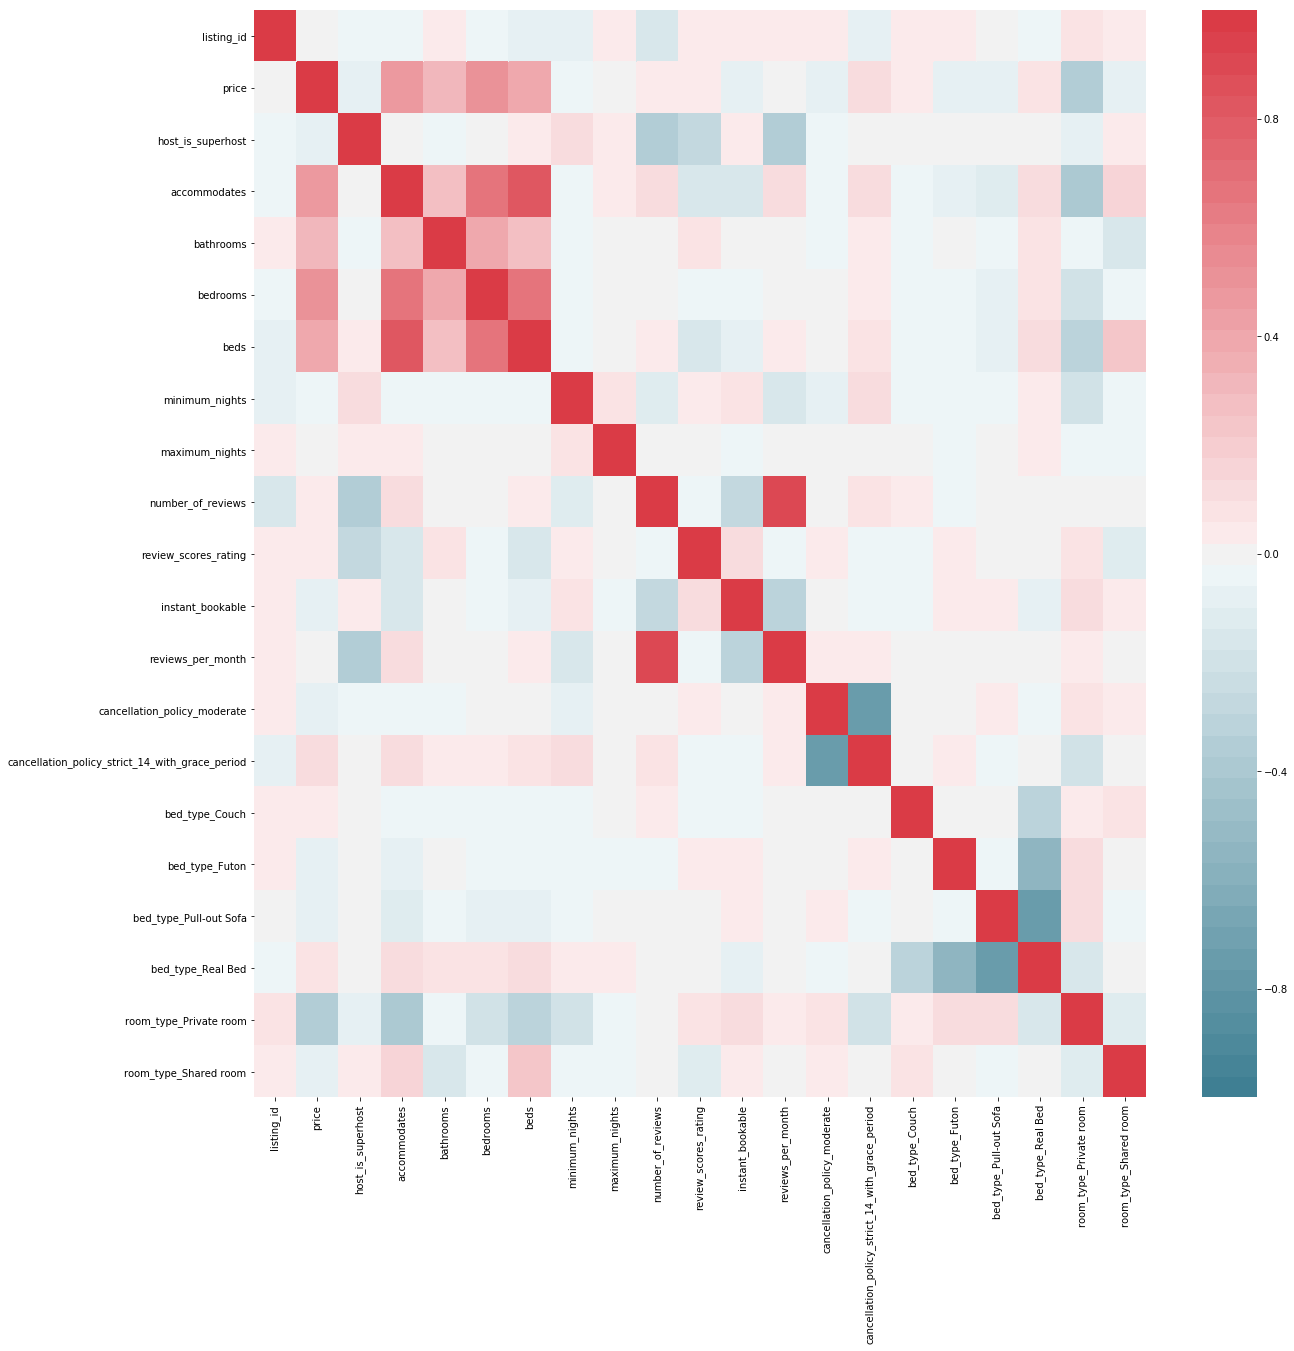

In [46]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(large_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=51)
           )

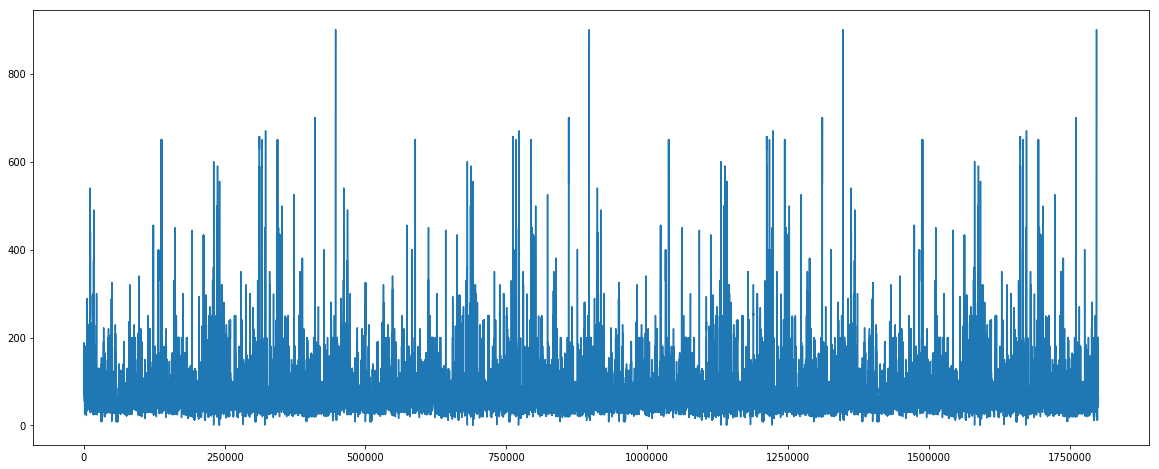

In [15]:
#  Just to visualize prices
ax = large_df.loc[:, 'price'].plot(figsize=(20,8))

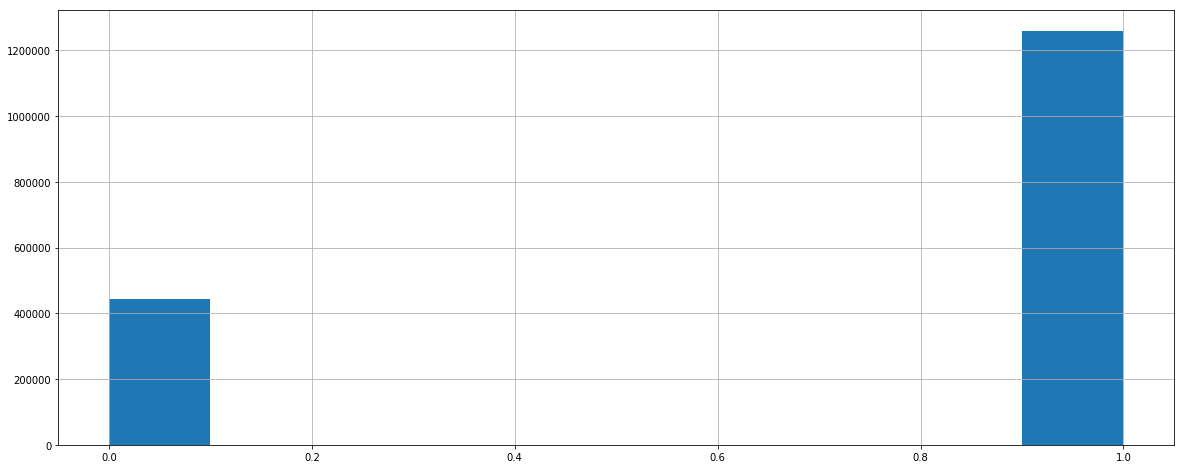

In [22]:
ax = large_df.loc[:, 'host_is_superhost'].hist(figsize=(20,8))

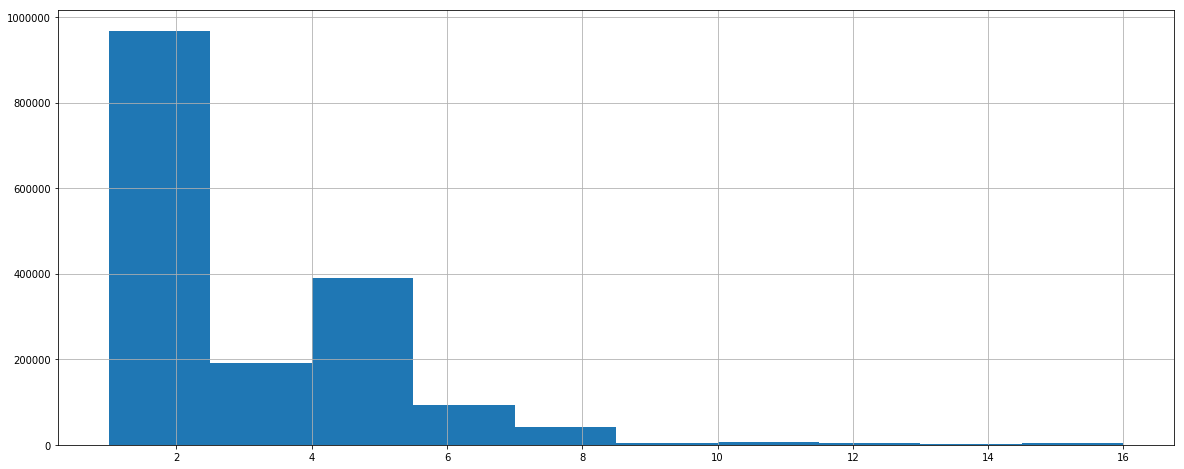

In [24]:
ax = large_df.loc[:, 'accommodates'].hist(figsize=(20,8))

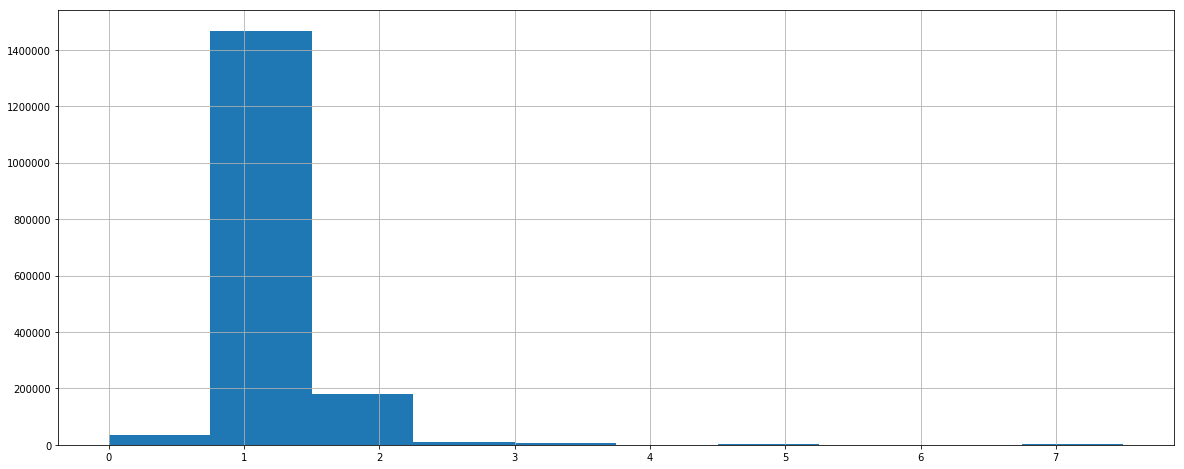

In [25]:
ax = large_df.loc[:, 'bathrooms'].hist(figsize=(20,8))

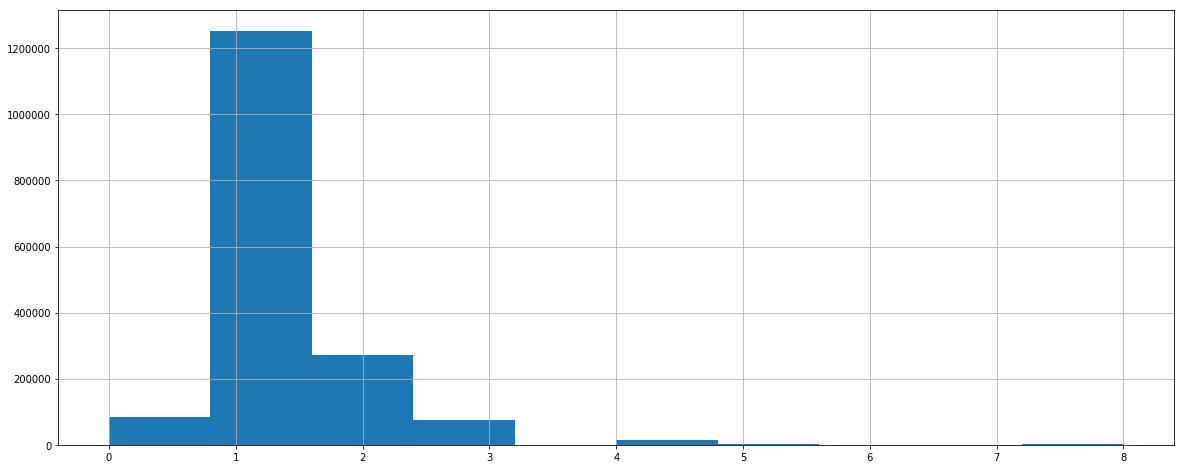

In [26]:
ax = large_df.loc[:, 'bedrooms'].hist(figsize=(20,8))

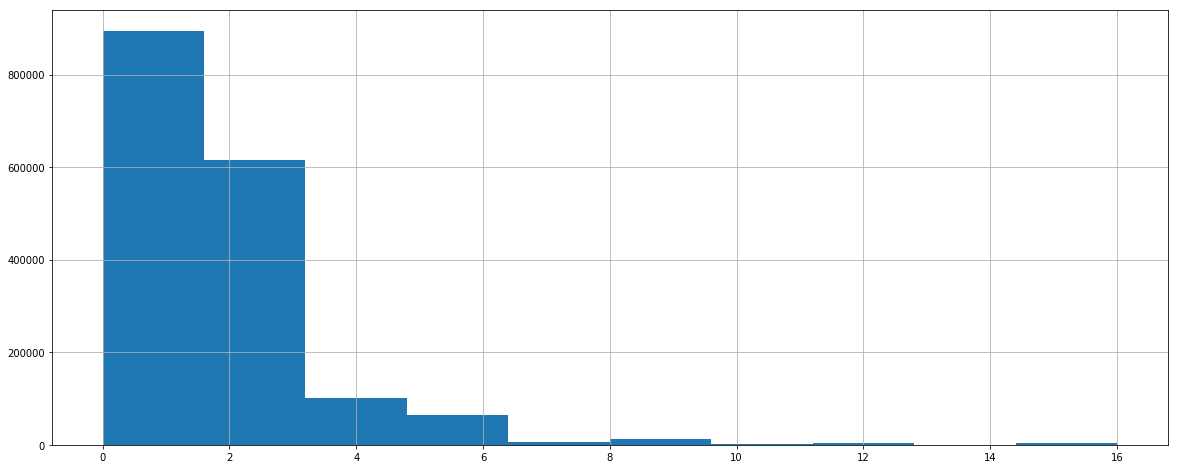

In [27]:
ax = large_df.loc[:, 'beds'].hist(figsize=(20,8))

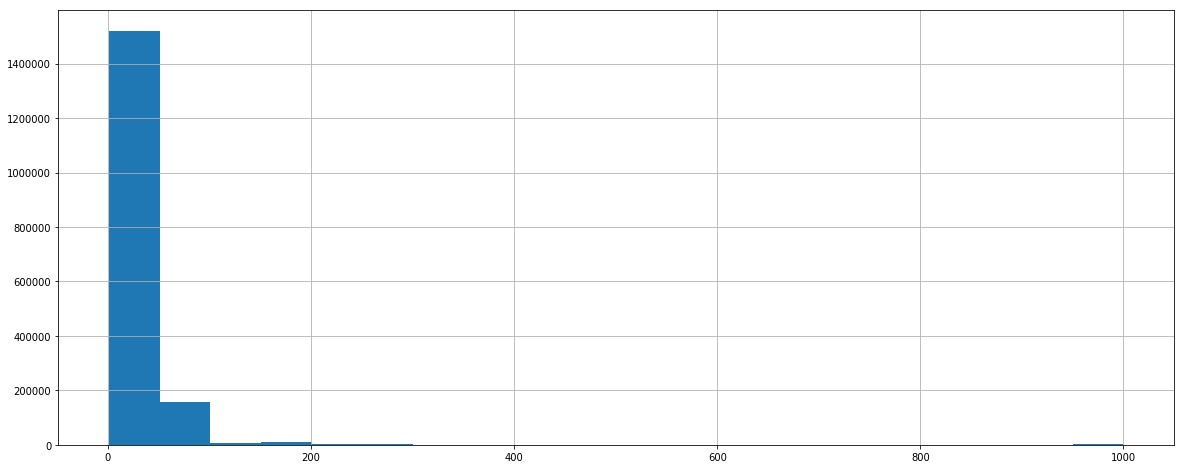

In [29]:
#  Clearly the singular datapont over at ~900 is messing with the data. I'll clear that up later
ax = large_df.loc[:, 'minimum_nights'].hist(figsize=(20,8), bins=20)

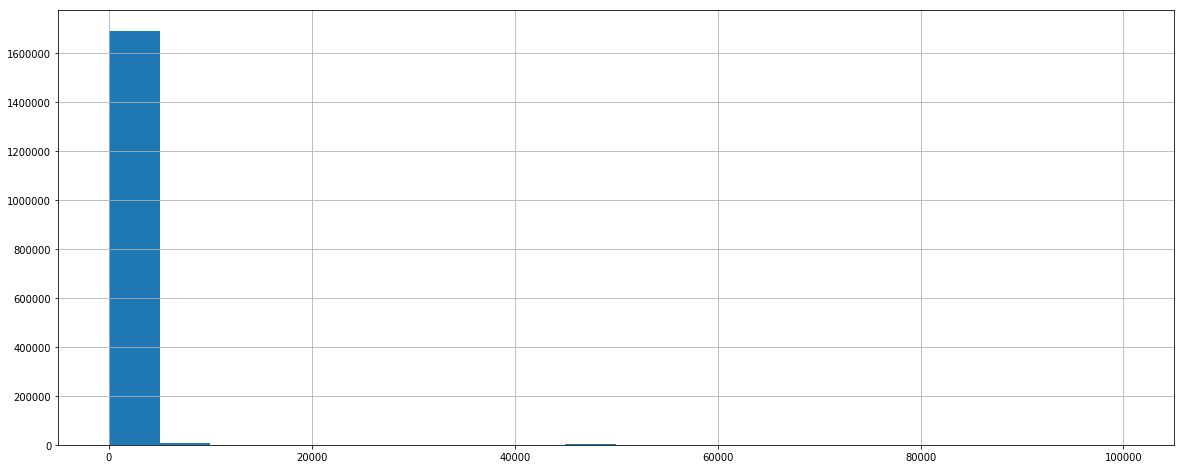

In [30]:
#  Clearly the singular datapont over at ~900 is messing with the data. I'll clear that up later
ax = large_df.loc[:, 'maximum_nights'].hist(figsize=(20,8), bins=20)

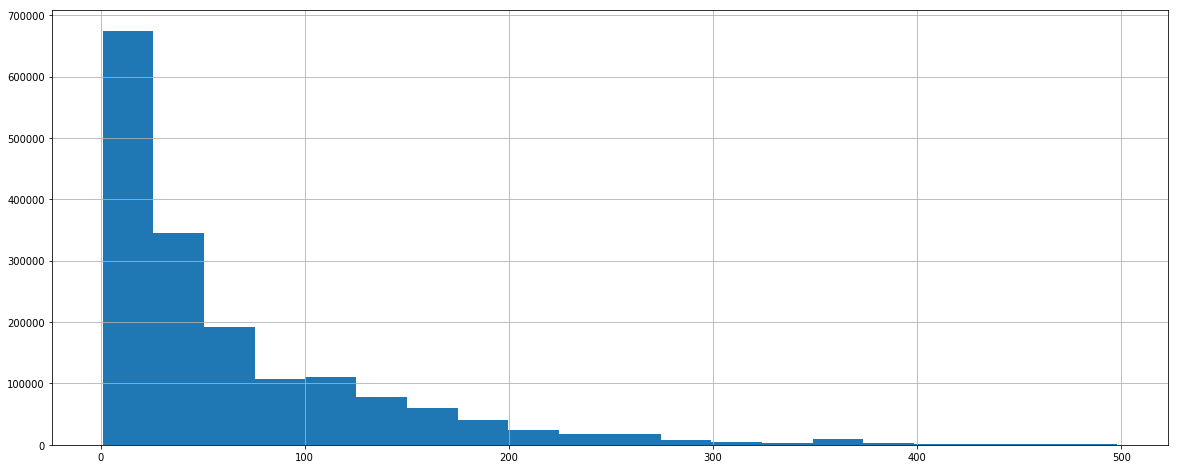

In [31]:
ax = large_df.loc[:, 'number_of_reviews'].hist(figsize=(20,8), bins=20)

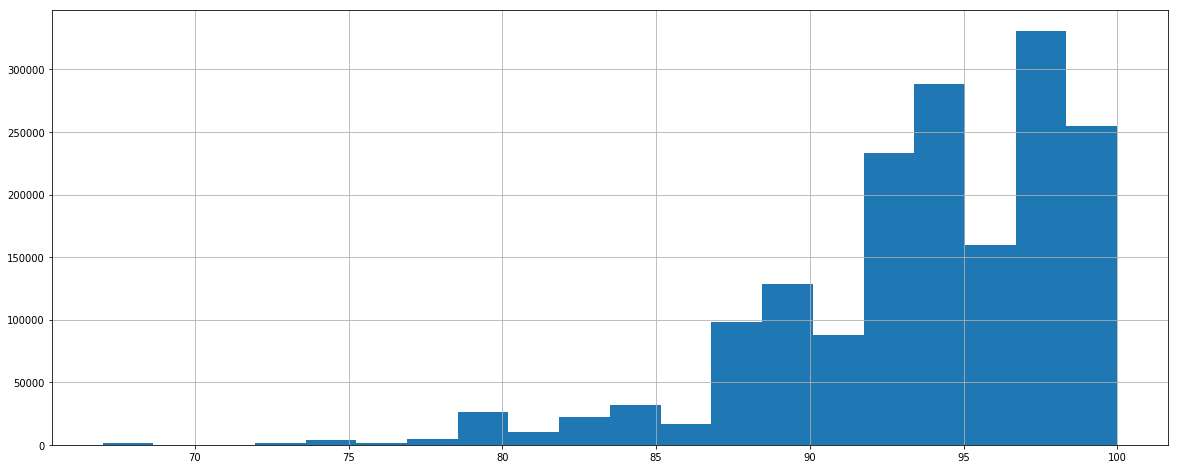

In [32]:
ax = large_df.loc[:, 'review_scores_rating'].hist(figsize=(20,8), bins=20)

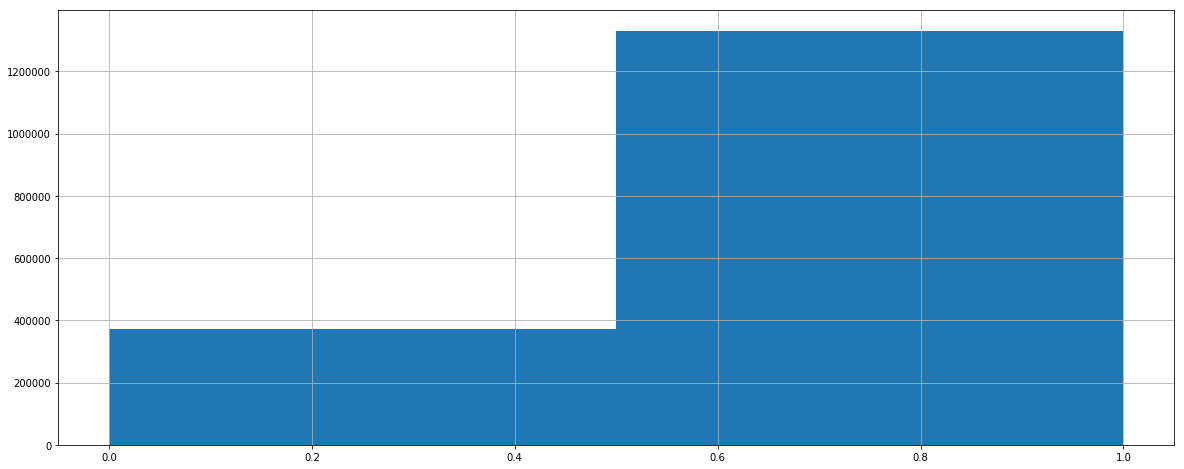

In [33]:
ax = large_df.loc[:, 'instant_bookable'].hist(figsize=(20,8), bins=2)

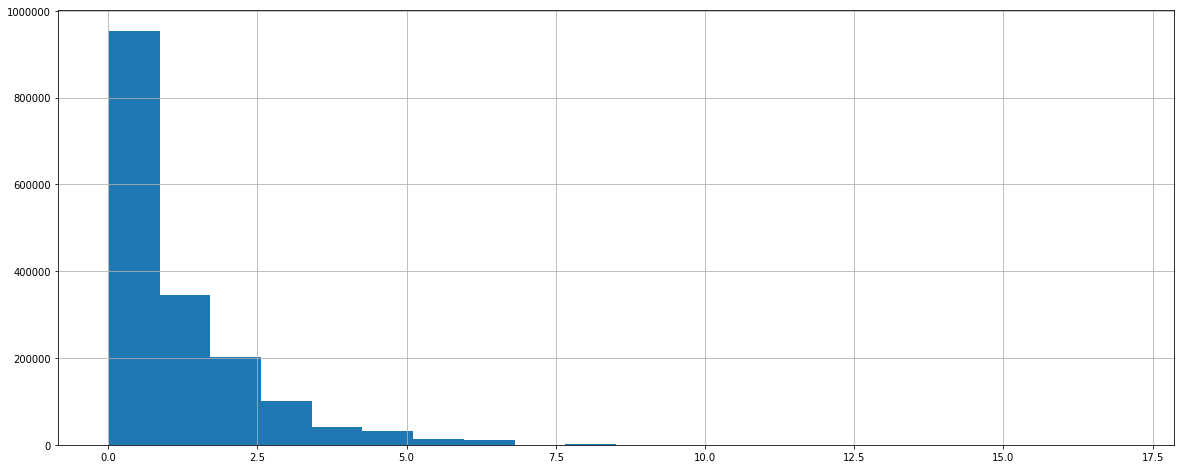

In [34]:
ax = large_df.loc[:, 'reviews_per_month'].hist(figsize=(20,8), bins=20)

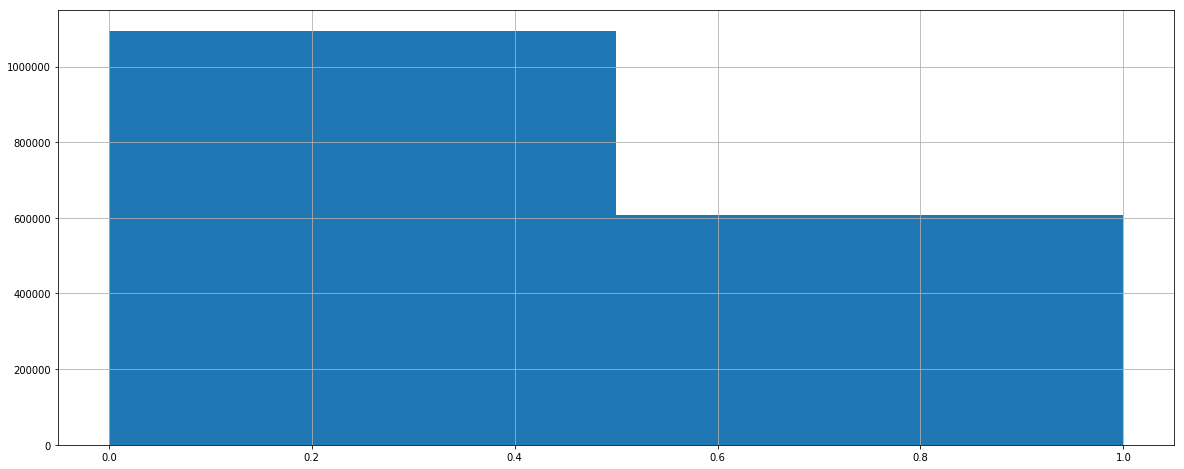

In [36]:
ax = large_df.loc[:, 'cancellation_policy_moderate'].hist(figsize=(20,8), bins=2)

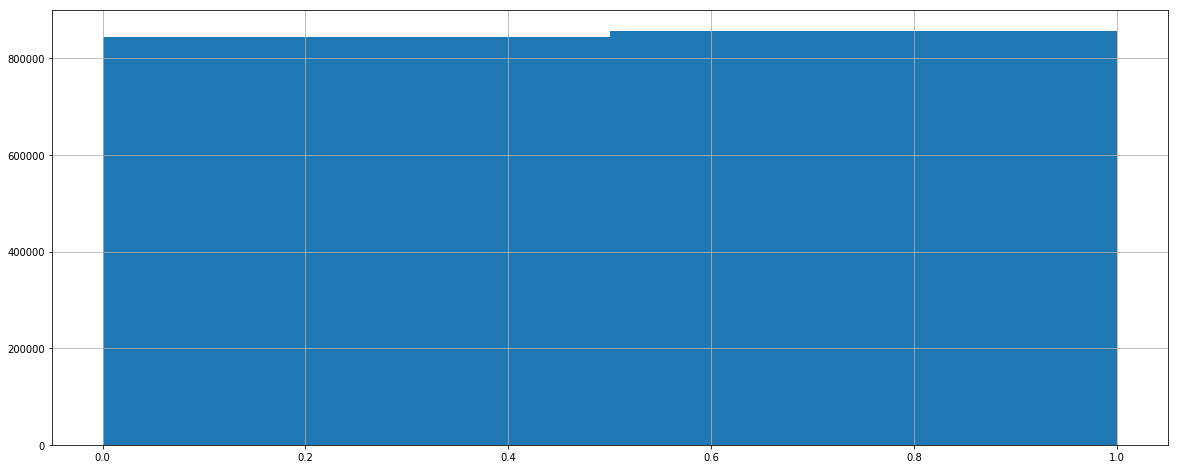

In [37]:
ax = large_df.loc[:, 'cancellation_policy_strict_14_with_grace_period'].hist(figsize=(20,8), bins=2)

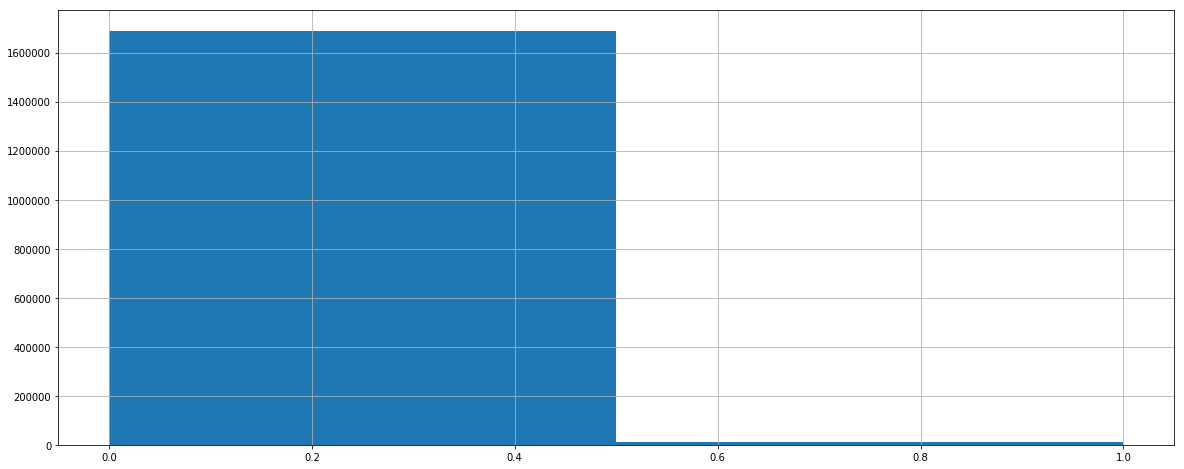

In [39]:
ax = large_df.loc[:, 'bed_type_Couch'].hist(figsize=(20,8), bins=2)

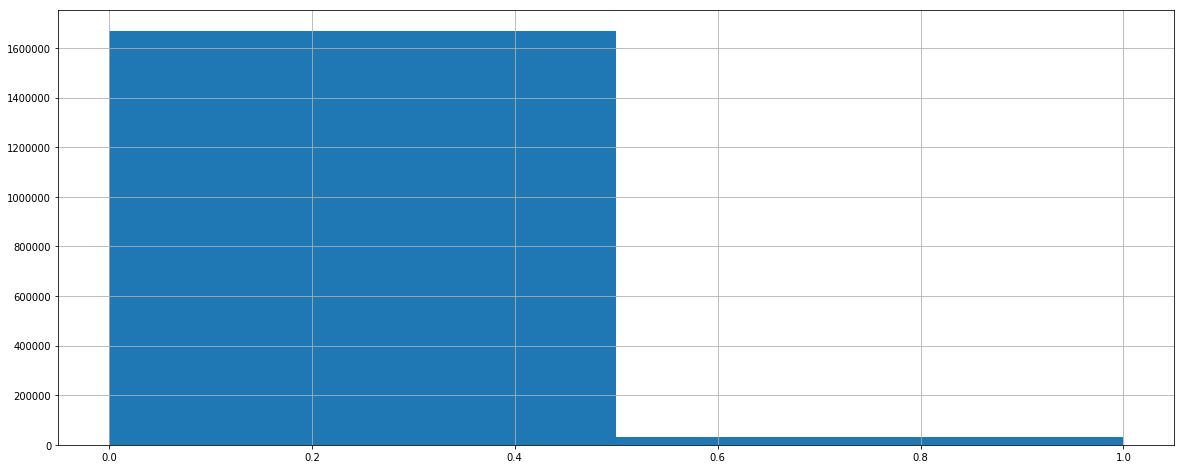

In [40]:
ax = large_df.loc[:, 'bed_type_Futon'].hist(figsize=(20,8), bins=2)

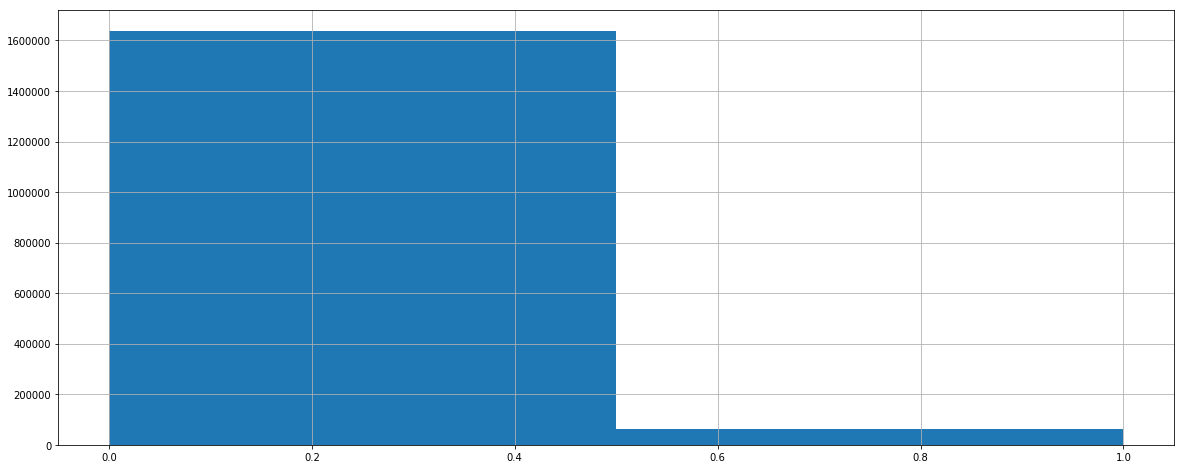

In [41]:
ax = large_df.loc[:, 'bed_type_Pull-out Sofa'].hist(figsize=(20,8), bins=2)

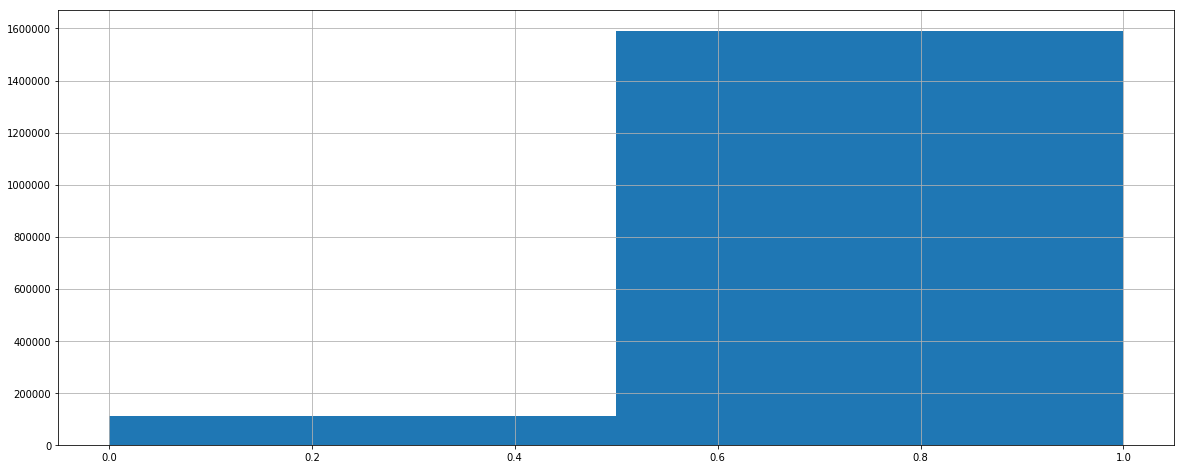

In [42]:
ax = large_df.loc[:, 'bed_type_Real Bed'].hist(figsize=(20,8), bins=2)

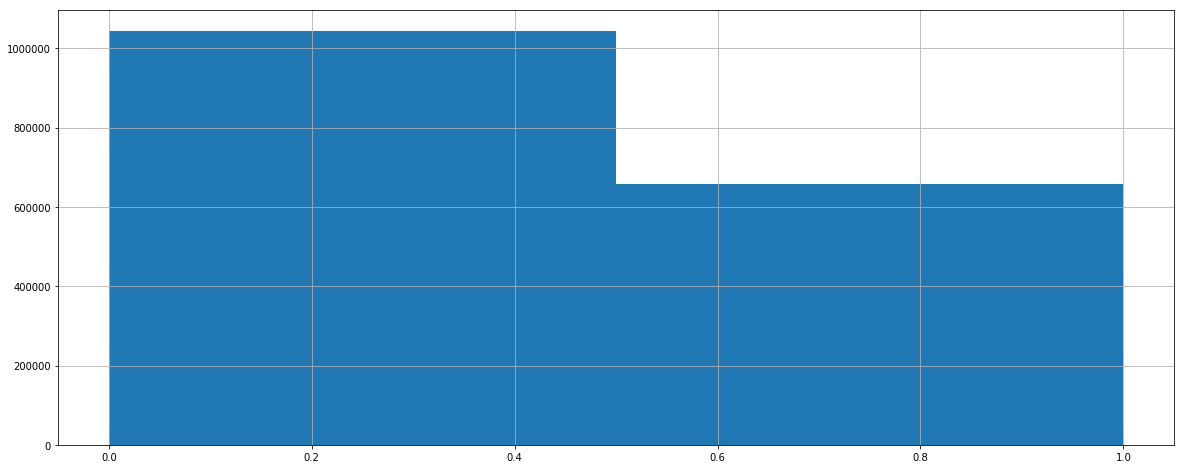

In [43]:
ax = large_df.loc[:, 'room_type_Private room'].hist(figsize=(20,8), bins=2)

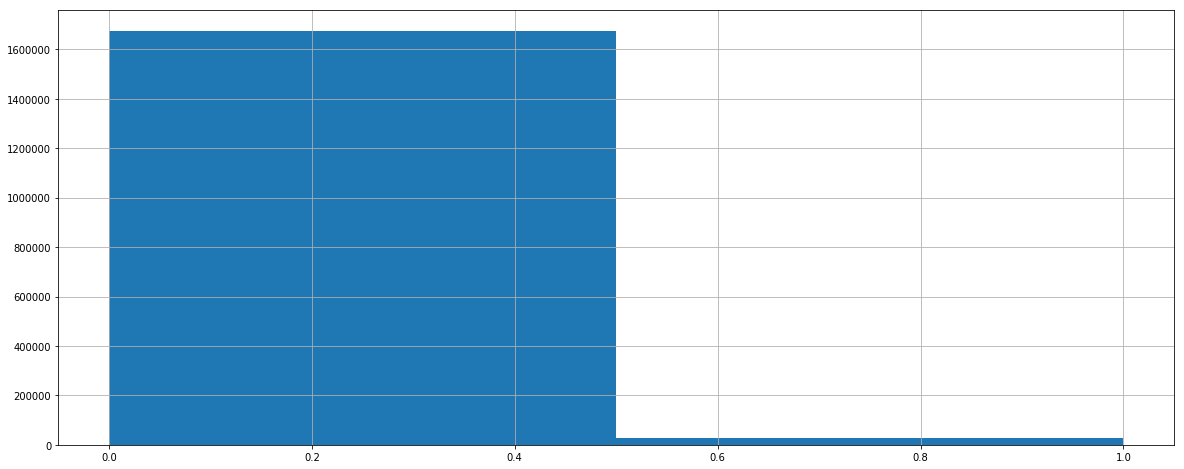

In [44]:
ax = large_df.loc[:, 'room_type_Shared room'].hist(figsize=(20,8), bins=2)

Some of the major shortcomings of the datasets as I see it include:
- There is no variable similar to 'is_holiday.' Day of the week, weekend vs. not, month, etc had no relationship to price, but I imagine prices rae higher around certain holidays (e.g., Christmas, New Years, others). I can hardcode these, and I might, but it would be nice if I didn't have to.
- There is no variable for the age or gender of either the renter or rentee. I would be curious to see if those interactions had any impact, but short of some NLP work on the names, there's little I can do on gender and nothing on age.
- I wish more of the info were more standardized. For instance, the amenities feature is just a list of things the apartment has (e.g., wifi, laundry, kitchen) but it is entered by the property owner and is in no way standardized, and so it is effectively unusable as a feature, even though it would be quite handy probably.
- There is no way of knowing when a listing was available but not rented, as far as I can tell, which throws off the idea of free market supply and demand auto-regulating, as I can't know when something is priced too high.

I don't think these shortcomings really necessitate any assumptions on my part, but they definitely limit the work I can do and conclusions I can draw. I guess I just have to assume that things like WiFi, laundry, w/e is not an important feature (though I don't believe that to be true).

Things I intend to improve:
- I intend to work in the neighborhoods csv, since there are only like ~12 or so neighborhoods in the set I could include it as a categorical variable attempting to account for area of town.
- I probably want to include holidays, both domestic and international, as I think it probably has an impact.
- Certain data points, while likely valid, are just such outliers (whether in terms of price or other features) that I think they aren't that representative and would like to exclude them most likely.
- Fine tuning the tradeoff between model bias and variance. The variance is already quite low (the R^2 of the test set is within .0001 of the training set), so I can definitely afford to increase complexity a bit.
- I have been treating this as a non-time-series dataset, but I'm curious what it would look like if I applied time-series techniques.

I have chosen RMSE and R^2 as my evaluation metrics. I prefer RMSE to MSE simply because it's more intuitive and of a scale we are more used to, and I prefer RMSE in this case to MAE because being really wrong once does matter to the stated goals of this model (namely, provide a useful estimate for the optimum price point). R^2 is also just a useful all-around metric and is one people are relatively used to seeing in the wild